# Churn prediction 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
import statsmodels.api as sm

In [2]:
churn=pd.read_csv('churn.csv')
churn.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [3]:
churn.shape

(3333, 11)

In [4]:
churn.describe()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.144914,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,0.352067,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,0.000000,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,0.000000,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,1.000000,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


In [5]:
churn.isnull().any()    

Churn              False
AccountWeeks       False
ContractRenewal    False
DataPlan           False
DataUsage          False
CustServCalls      False
DayMins            False
DayCalls           False
MonthlyCharge      False
OverageFee         False
RoamMins           False
dtype: bool

In [6]:
churn['Churn'].value_counts()

0    2850
1     483
Name: Churn, dtype: int64

In [7]:
churn.duplicated().sum()

0

No null values


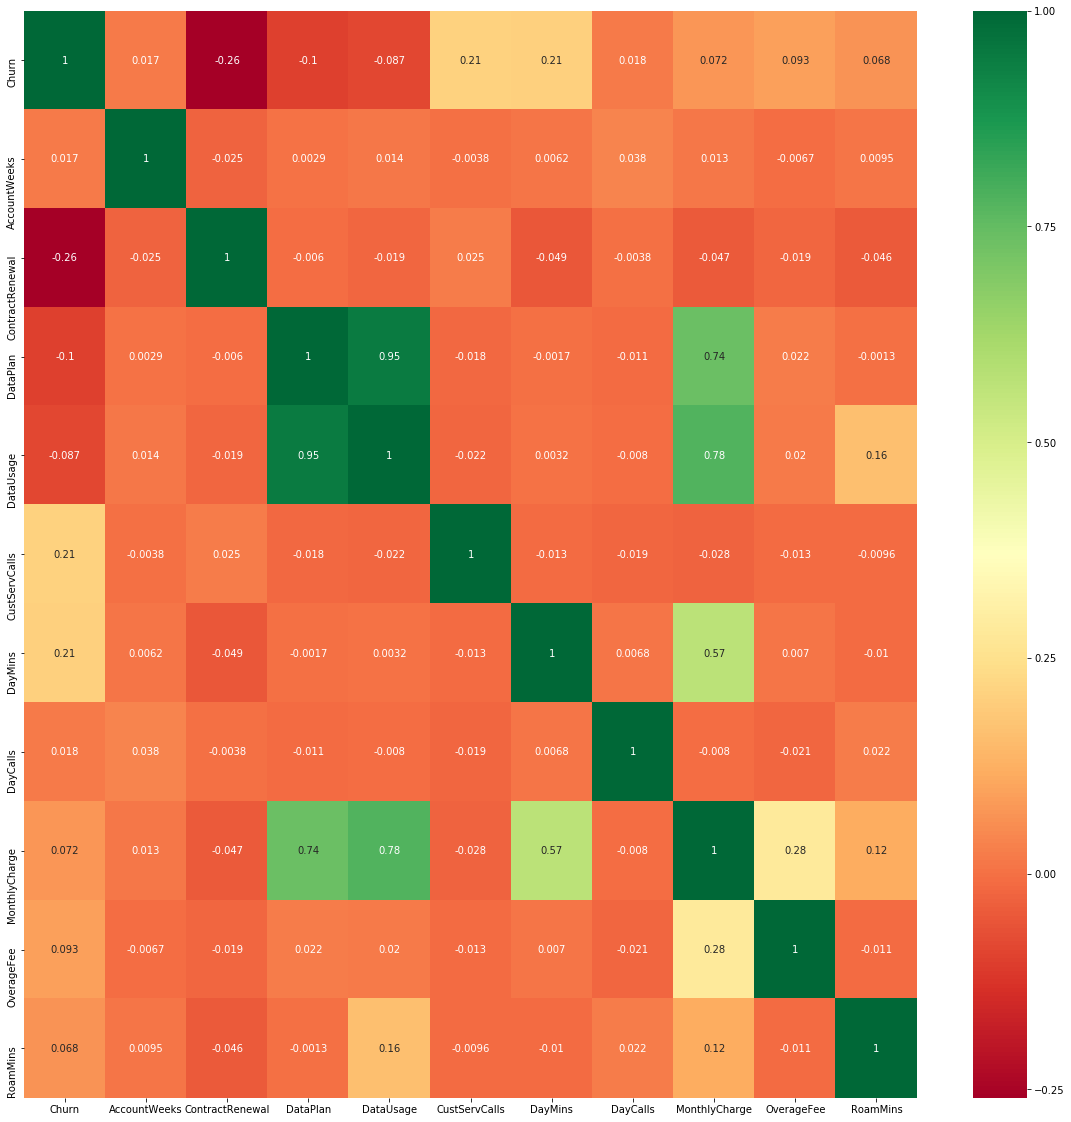

In [8]:
corrmat = churn.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(churn[top_corr_features].corr(),annot=True,cmap="RdYlGn")

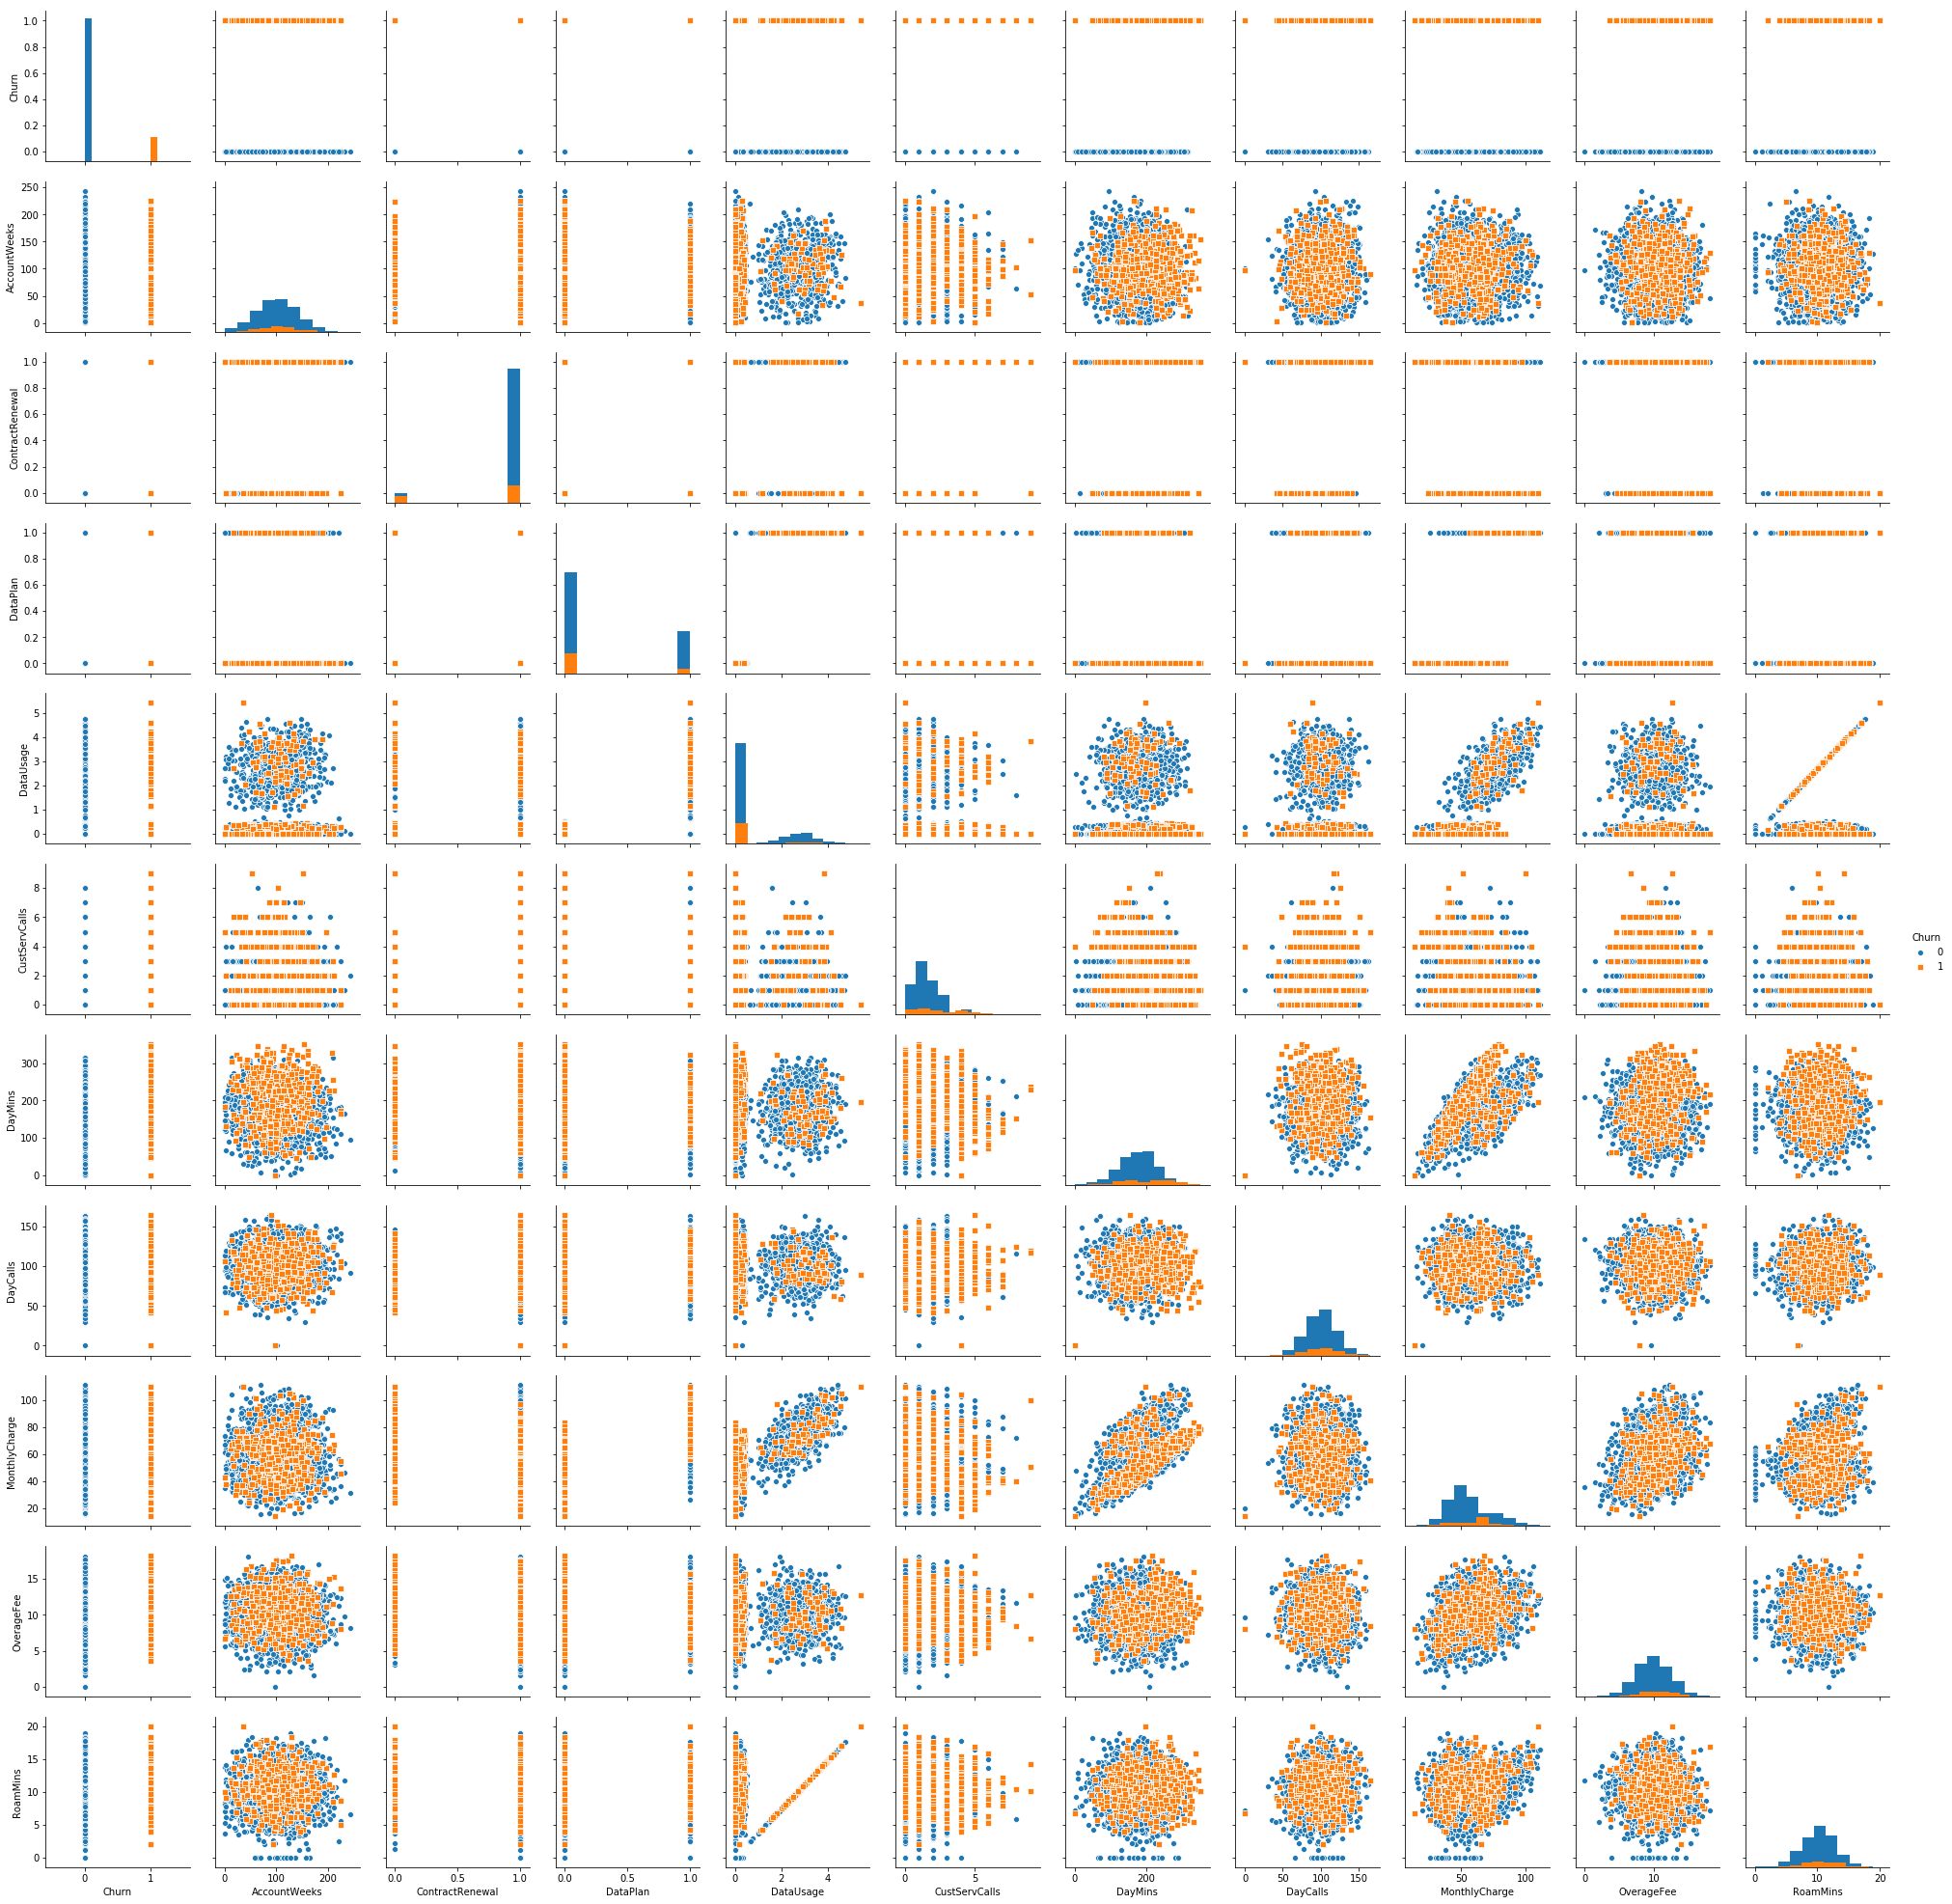

In [9]:
sns.pairplot(churn, hue ='Churn', markers=['o','s'], diag_kind="hist")

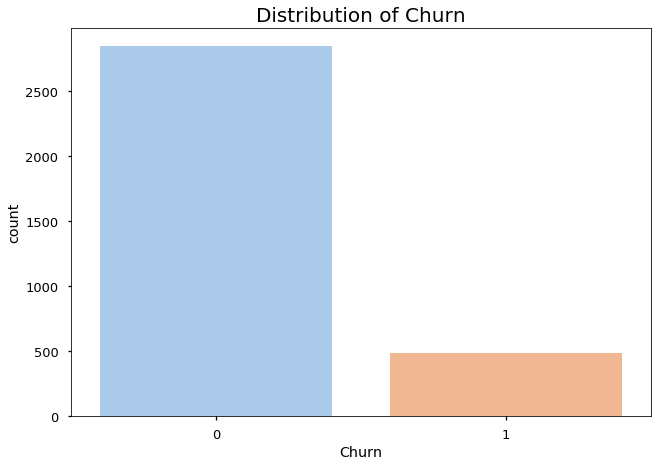

In [10]:
plt.rcParams['figure.figsize'] = (15, 7)
plt.style.use('seaborn-talk')
sns.countplot(churn['Churn'], palette = 'pastel')
plt.title('Distribution of Churn', fontsize = 20)
plt.show()

In [11]:
y=churn['Churn']   #making y target
churn= churn.drop('Churn', axis = 1)  #removing churn from table
x=churn
x

,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
2,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
3,84,0,0,0.00,2,299.4,71,57.0,3.10,6.6
4,75,0,0,0.00,3,166.7,113,41.0,7.42,10.1
5,118,0,0,0.00,0,223.4,98,57.0,11.03,6.3
6,121,1,1,2.03,3,218.2,88,87.3,17.43,7.5
7,147,0,0,0.00,0,157.0,79,36.0,5.16,7.1
8,117,1,0,0.19,1,184.5,97,63.9,17.58,8.7
9,141,0,1,3.02,0,258.6,84,93.2,11.10,11.2


# using backward elimination to get columns with high correlations and making a new data frame for them

In [12]:
#uses backward elimination to iterate through columns and print those with highest correlation whose pvalue>0.05
#Backward Elimination
cols = list(x.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = x[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['ContractRenewal', 'DataPlan', 'CustServCalls', 'DayMins', 'OverageFee', 'RoamMins']


C:\Users\yfird\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [13]:
churn2=churn.filter(['ContractRenewal','DataPlan','CustServCalls','DayMins','OverageFee','RoamMins'], axis=1)
print(churn2)
churn2=pd.DataFrame(churn2)

      ContractRenewal  DataPlan  CustServCalls  DayMins  OverageFee  RoamMins
0                   1         1              1    265.1        9.87      10.0
1                   1         1              1    161.6        9.78      13.7
2                   1         0              0    243.4        6.06      12.2
3                   0         0              2    299.4        3.10       6.6
4                   0         0              3    166.7        7.42      10.1
5                   0         0              0    223.4       11.03       6.3
6                   1         1              3    218.2       17.43       7.5
7                   0         0              0    157.0        5.16       7.1
8                   1         0              1    184.5       17.58       8.7
9                   0         1              0    258.6       11.10      11.2
10                  1         0              4    129.1       11.43      12.7
11                  1         0              0    187.7        8

In [14]:
target=pd.DataFrame(y)
target

,Churn
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [15]:
churn2.dtypes

ContractRenewal      int64
DataPlan             int64
CustServCalls        int64
DayMins            float64
OverageFee         float64
RoamMins           float64
dtype: object

In [16]:
target.dtypes

Churn    int64
dtype: object

In [17]:
#churn2['CustServCalls'] = churn2['CustServCalls'].astype(int)
#churn2['DayMins'] = churn2['DayMins'].astype(int)
#churn2['OverageFee'] = churn2['OverageFee'].astype(int)
#churn2['RoamMins'] = churn2['RoamMins'].astype(int)


In [18]:
churn2.head()


,ContractRenewal,DataPlan,CustServCalls,DayMins,OverageFee,RoamMins
0,1,1,1,265.1,9.87,10.0
1,1,1,1,161.6,9.78,13.7
2,1,0,0,243.4,6.06,12.2
3,0,0,2,299.4,3.10,6.6
4,0,0,3,166.7,7.42,10.1


In [19]:
churn2.reset_index(drop=True, inplace=True)
target.reset_index(drop=True, inplace=True)

In [20]:
churns=[churn2, target]
churns=pd.concat((churns), axis=1)


In [21]:
churns  #new table


,ContractRenewal,DataPlan,CustServCalls,DayMins,OverageFee,RoamMins,Churn
0,1,1,1,265.1,9.87,10.0,0
1,1,1,1,161.6,9.78,13.7,0
2,1,0,0,243.4,6.06,12.2,0
3,0,0,2,299.4,3.10,6.6,0
4,0,0,3,166.7,7.42,10.1,0
5,0,0,0,223.4,11.03,6.3,0
6,1,1,3,218.2,17.43,7.5,0
7,0,0,0,157.0,5.16,7.1,0
8,1,0,1,184.5,17.58,8.7,0
9,0,1,0,258.6,11.10,11.2,0


In [22]:
churns.describe()

,ContractRenewal,DataPlan,CustServCalls,DayMins,OverageFee,RoamMins,Churn
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.903090,0.276628,1.562856,179.775098,10.051488,10.237294,0.144914
std,0.295879,0.447398,1.315491,54.467389,2.535712,2.791840,0.352067
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,1.000000,143.700000,8.330000,8.500000,0.000000
50%,1.000000,0.000000,1.000000,179.400000,10.070000,10.300000,0.000000
75%,1.000000,1.000000,2.000000,216.400000,11.770000,12.100000,0.000000
max,1.000000,1.000000,9.000000,350.800000,18.190000,20.000000,1.000000


# **Checking for outliers usings z score and box plot**

In [23]:
z = np.abs(stats.zscore(churns)) #using it to fid the z score
print(z)


[[0.32758048 1.6170861  0.42793202 ... 0.0715836  0.08500823 0.41167182]
 [0.32758048 1.6170861  0.42793202 ... 0.10708191 1.24048169 0.41167182]
 [0.32758048 0.61839626 1.1882185  ... 1.57434567 0.70312091 0.41167182]
 ...
 [0.32758048 0.61839626 0.33235445 ... 1.73094204 1.3837779  0.41167182]
 [3.05268496 0.61839626 0.33235445 ... 0.81704825 1.87621082 0.41167182]
 [0.32758048 1.6170861  1.1882185  ... 1.28129669 1.24048169 0.41167182]]


In [24]:
threshold = 3
print(np.where(z > 3))  #first list represent rows and second list columns

(array([   3,    4,    5,    7,    9,   32,   38,   41,   66,   67,   81,
        115,  115,  135,  144,  147,  179,  180,  184,  198,  211,  214,
        230,  231,  234,  241,  254,  258,  269,  276,  279,  314,  319,
        332,  343,  351,  354,  356,  358,  360,  365,  372,  378,  382,
        383,  405,  408,  416,  425,  444,  465,  486,  488,  491,  492,
        495,  498,  502,  503,  514,  522,  529,  533,  542,  542,  546,
        547,  553,  567,  569,  572,  586,  595,  601,  613,  616,  619,
        626,  679,  694,  708,  712,  715,  716,  721,  734,  735,  737,
        749,  762,  762,  766,  771,  773,  777,  778,  779,  780,  781,
        783,  790,  792,  797,  808,  821,  826,  830,  837,  842,  851,
        869,  877,  878,  889,  893,  900,  902,  908,  933,  957,  974,
        985,  985,  987, 1005, 1024, 1027, 1028, 1037, 1042, 1044, 1052,
       1052, 1064, 1080, 1083, 1117, 1128, 1136, 1142, 1149, 1158, 1161,
       1165, 1169, 1191, 1192, 1193, 1204, 1209, 1

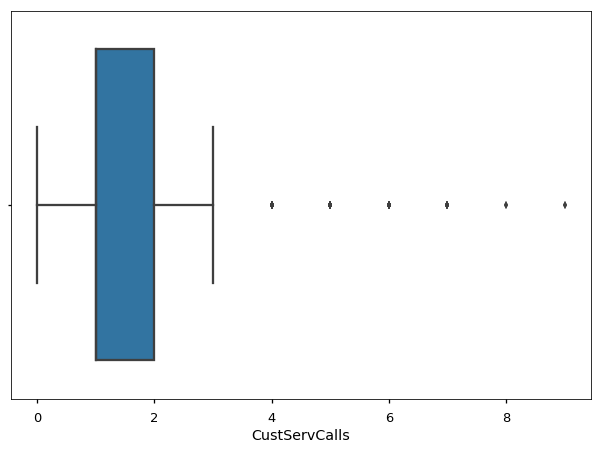

In [25]:
sns.boxplot(churns['CustServCalls'])    #AccountWeeks	ContractRenewal	DataPlan	DataUsage	CustServCalls	DayMins	DayCalls	MonthlyCharge	OverageFee	RoamMins

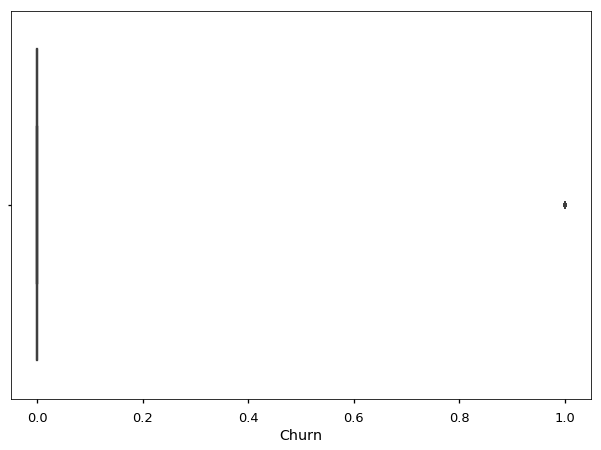

In [26]:
sns.boxplot(churns['Churn'])

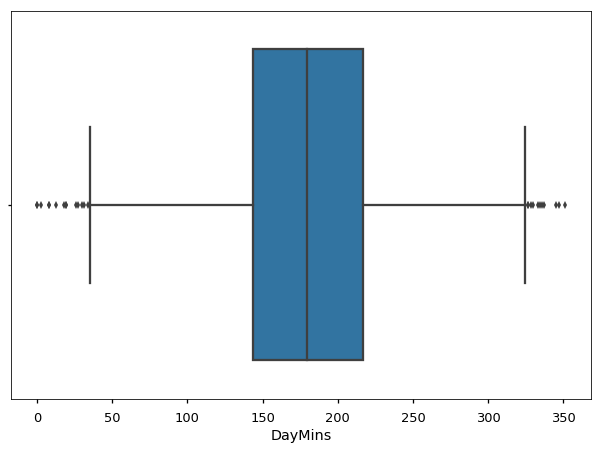

In [27]:
sns.boxplot(churns['DayMins'])    #AccountWeeks	ContractRenewal	DataPlan	DataUsage	CustServCalls	DayMins	DayCalls	MonthlyCharge	OverageFee	RoamMins

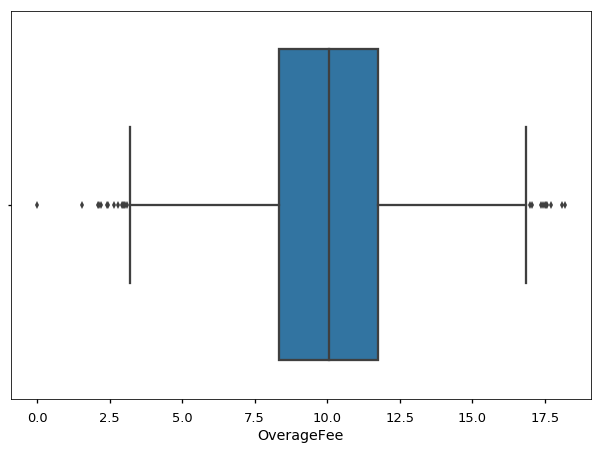

In [28]:
sns.boxplot(churns['OverageFee'])    #AccountWeeks	ContractRenewal	DataPlan	DataUsage	CustServCalls	DayMins	DayCalls	MonthlyCharge	OverageFee	RoamMins

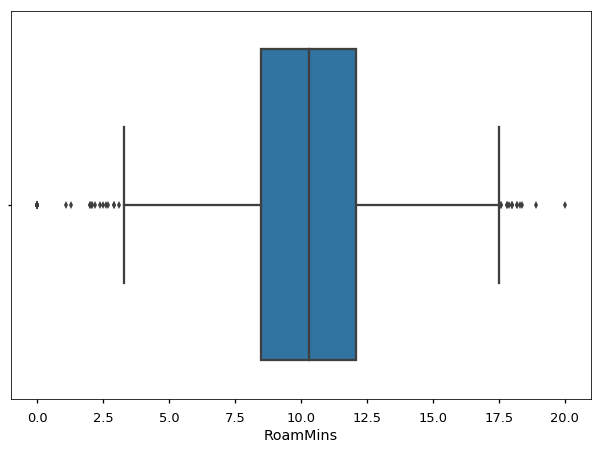

In [29]:
sns.boxplot(churns['RoamMins'])    #AccountWeeks	ContractRenewal	DataPlan	DataUsage	CustServCalls	DayMins	DayCalls	MonthlyCharge	OverageFee	RoamMins

# USING IQR TO DETECT OUTLIERS

In [30]:
Q1 = churns.quantile(0.25)
Q3 = churns.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

ContractRenewal     0.00
DataPlan            1.00
CustServCalls       1.00
DayMins            72.70
OverageFee          3.44
RoamMins            3.60
Churn               0.00
dtype: float64


In [31]:
o=(churns < (Q1 - 1.5 * IQR)) |(churns > (Q3 + 1.5 * IQR))
o=pd.DataFrame(o)
print(o)   #where value=True shows it is an  outlier

      ContractRenewal  DataPlan  CustServCalls  DayMins  OverageFee  RoamMins  \
0               False     False          False    False       False     False   
1               False     False          False    False       False     False   
2               False     False          False    False       False     False   
3                True     False          False    False        True     False   
4                True     False          False    False       False     False   
5                True     False          False    False       False     False   
6               False     False          False    False        True     False   
7                True     False          False    False       False     False   
8               False     False          False    False        True     False   
9                True     False          False    False       False     False   
10              False     False           True    False       False     False   
11              False     Fa

In [32]:
churns.shape

(3333, 7)

### **PREPROCESSING OF DATA**

# CORRECTING / REMOVING OUTLERS USING Z SCORE AND QUANTILE BASED FLOORING&CAPPING

In [33]:
churns.shape

(3333, 7)

Checking for number of outliers in each column

In [34]:
outliers_no= o.sum()
outliers_no

ContractRenewal    323
DataPlan             0
CustServCalls      267
DayMins             25
OverageFee          24
RoamMins            46
Churn              483
dtype: int64

In [35]:
print(churns['RoamMins'].skew())  
churns['RoamMins'].describe()

-0.2451359394861856


count    3333.000000
mean       10.237294
std         2.791840
min         0.000000
25%         8.500000
50%        10.300000
75%        12.100000
max        20.000000
Name: RoamMins, dtype: float64

Roam mins data is left skewed

In [36]:
print(churns['CustServCalls'].skew())
churns['CustServCalls'].describe()

1.0913594824728512


count    3333.000000
mean        1.562856
std         1.315491
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         9.000000
Name: CustServCalls, dtype: float64

CUTSERVECALLS IS RIGHT SKEWED

using flooring and capping to reduce the number of ouliers 

In [37]:
#print(churns['RoamMins'].quantile(0.10))
#print(churns['RoamMins'].quantile(0.90))

In [38]:
print(churns['CustServCalls'].quantile(0.10)) #CHANGED FIRST PERCENTILE T0 10%
print(churns['CustServCalls'].quantile(0.90)) #CHANGED 3RD PERCENTILE TO 90%

0.0
3.0


In [39]:
#churns["RoamMins"] = np.where(churns["RoamMins"] <6.84, 6.84,churns['RoamMins'])
#churns["RoamMins"] = np.where(churns["OverageFee"] >13.249, 13.249,churns['RoamMins'])
#print(churns['RoamMins'].skew())

In [40]:
churns["CustServCalls"] = np.where(churns["CustServCalls"] <6.84, 6.84,churns['CustServCalls'])
churns["CustServCalls"] = np.where(churns["CustServCalls"] >6.84, 6.84,churns['CustServCalls'])
print(churns['CustServCalls'].skew())

0


In [41]:
churns = churns[(z < 3).all(axis=1)]
 #removed 391 values(outliers)

In [42]:
churns['Churn'].value_counts()

0    2619
1     323
Name: Churn, dtype: int64

In [43]:
churns.shape

(2942, 7)

In [44]:
churns.describe() #huge difference in range of values for account weeks,day mins,day calls,monthly charge in std so there is a need for

,ContractRenewal,DataPlan,CustServCalls,DayMins,OverageFee,RoamMins,Churn
count,2942.0,2942.000000,2.942000e+03,2942.000000,2942.000000,2942.000000,2942.000000
mean,1.0,0.275663,6.840000e+00,179.503671,10.050377,10.262305,0.109789
std,0.0,0.446924,1.270311e-13,53.597159,2.496190,2.688693,0.312680
min,1.0,0.000000,6.840000e+00,17.600000,2.460000,2.000000,0.000000
25%,1.0,0.000000,6.840000e+00,143.725000,8.330000,8.500000,0.000000
50%,1.0,0.000000,6.840000e+00,179.350000,10.075000,10.300000,0.000000
75%,1.0,1.000000,6.840000e+00,215.500000,11.770000,12.100000,0.000000
max,1.0,1.000000,6.840000e+00,337.400000,17.580000,18.400000,1.000000


### FEATURE SCALING

In [45]:
sc=StandardScaler()
columns_scale=["DayMins","OverageFee","RoamMins"]
churns[columns_scale]=sc.fit_transform(churns[columns_scale])
churns.describe()

C:\Users\yfird\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\yfird\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,ContractRenewal,DataPlan,CustServCalls,DayMins,OverageFee,RoamMins,Churn
count,2942.0,2942.000000,2.942000e+03,2.942000e+03,2.942000e+03,2.942000e+03,2942.000000
mean,1.0,0.275663,6.840000e+00,2.081574e-16,2.326864e-16,6.551146e-16,0.109789
std,0.0,0.446924,1.270311e-13,1.000170e+00,1.000170e+00,1.000170e+00,0.312680
min,1.0,0.000000,6.840000e+00,-3.021264e+00,-3.041302e+00,-3.073505e+00,0.000000
25%,1.0,0.000000,6.840000e+00,-6.676614e-01,-6.893185e-01,-6.555618e-01,0.000000
50%,1.0,0.000000,6.840000e+00,-2.867635e-03,9.865793e-03,1.402237e-02,0.000000
75%,1.0,1.000000,6.840000e+00,6.717231e-01,6.890161e-01,6.836065e-01,0.000000
max,1.0,1.000000,6.840000e+00,2.946484e+00,3.016959e+00,3.027151e+00,1.000000


In [46]:
 #making y target
y=churns['Churn']   #making y target
churns= churns.drop('Churn', axis = 1)  #removing churn from table
x=churns
x

,ContractRenewal,DataPlan,CustServCalls,DayMins,OverageFee,RoamMins
0,1,1,6.84,1.597303,-0.072273,-0.097575
1,1,1,6.84,-0.334098,-0.108334,1.278792
2,1,0,6.84,1.192362,-1.598859,0.720806
6,1,1,6.84,0.722107,2.956857,-1.027553
8,1,0,6.84,0.093236,3.016959,-0.581164
10,1,0,6.84,-0.940577,0.552785,0.906801
11,1,0,6.84,0.152951,-0.753427,-0.432367
12,1,0,6.84,-0.946175,-1.923409,0.348814
13,1,0,6.84,-0.427403,0.933430,0.758005
14,1,0,6.84,-1.097328,2.127453,1.055598


In [47]:
y

0       0
1       0
2       0
6       0
8       0
10      1
11      0
12      0
13      0
14      0
15      1
16      0
17      0
18      0
19      0
20      0
21      1
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
30      0
31      0
33      1
34      0
35      0
       ..
3297    0
3298    0
3299    0
3300    0
3301    1
3303    0
3305    0
3306    0
3307    0
3308    0
3310    0
3311    0
3312    0
3313    0
3314    0
3315    0
3316    0
3318    0
3319    0
3321    0
3322    1
3323    1
3324    0
3325    0
3326    0
3327    0
3328    0
3329    0
3330    0
3332    0
Name: Churn, Length: 2942, dtype: int64

In [48]:
x.shape

(2942, 6)

In [49]:
y.shape

(2942,)

**### MODELLING**

predicting if a custormer is likely to churn or not(classifictaion)

In [50]:
y.shape

(2942,)

In [51]:
churns.head()

,ContractRenewal,DataPlan,CustServCalls,DayMins,OverageFee,RoamMins
0,1,1,6.84,1.597303,-0.072273,-0.097575
1,1,1,6.84,-0.334098,-0.108334,1.278792
2,1,0,6.84,1.192362,-1.598859,0.720806
6,1,1,6.84,0.722107,2.956857,-1.027553
8,1,0,6.84,0.093236,3.016959,-0.581164


In [52]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (2059, 6) (2059,)
Test set: (883, 6) (883,)


In [53]:

# Make an instance of the Model
#pca = PCA(.95)

In [54]:
#pca.fit(x_train)

In [55]:
#x_train = pca.transform(x_train)
#x_test= pca.transform(x_test) #apply to training and testing data

## LOGISTIC REGRESSION

In [56]:
logistic_model = LogisticRegression(random_state=42, solver='liblinear',class_weight='balanced').fit(x_train,y_train)
logistic_model

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=42,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [57]:
print("Classes: ", logistic_model.classes_)
print("Intercept: ",logistic_model.intercept_)
print("Coef: ",logistic_model.coef_)


Classes:  [0 1]
Intercept:  [-0.00049507]
Coef:  [[-4.95068481e-04 -8.51836786e-01 -3.38626841e-03  5.86840407e-01
   2.02574623e-01  3.21737743e-02]]


In [58]:
cv = cross_validate(logistic_model,x_train,y_train,cv = 3, n_jobs=-1, return_estimator=True)

In [59]:
print("Mean training accuracy: {}".format(np.mean(cv['test_score'])))

print("Test accuracy: {}".format(cv["estimator"][0].score(x_test,y_test)))

Mean training accuracy: 0.6522690590064264
Test accuracy: 0.6443941109852774


In [60]:
coef=logistic_model.coef_

In [61]:
y_pred=logistic_model.predict(x_test)

In [62]:
df_pred_actual =pd.DataFrame({'predicted':y_pred, 'actual': y_test})
df_pred_actual.head(10)

,predicted,actual
2620,1,0
733,0,0
2243,0,0
195,0,0
1644,0,0
607,0,0
2691,0,0
1900,1,0
359,0,0
1671,0,0


confusion matrix

In [63]:
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score

final_model = cv["estimator"][0]

y_pred = final_model.predict(x_test)

log_ac= accuracy_score(y_test,y_pred)

print("Accuracy:",accuracy_score(y_test,y_pred))
print("Precision:",precision_score(y_test,y_pred))
print("Recall:",recall_score(y_test,y_pred))
print("F1 Score:",f1_score(y_test,y_pred))

Accuracy: 0.6443941109852774
Precision: 0.20175438596491227
Recall: 0.6272727272727273
F1 Score: 0.3053097345132743


              precision    recall  f1-score   support

           0       0.92      0.65      0.76       773
           1       0.20      0.63      0.31       110

   micro avg       0.64      0.64      0.64       883
   macro avg       0.56      0.64      0.53       883
weighted avg       0.83      0.64      0.70       883



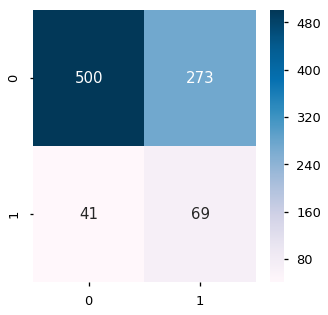

In [64]:
# cofusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, annot_kws = {'size':15}, cmap = 'PuBu', fmt='g')

# classification report
cr = classification_report(y_test, y_pred)
print(cr)

In [65]:
print( np.unique( y_pred) )

[0 1]


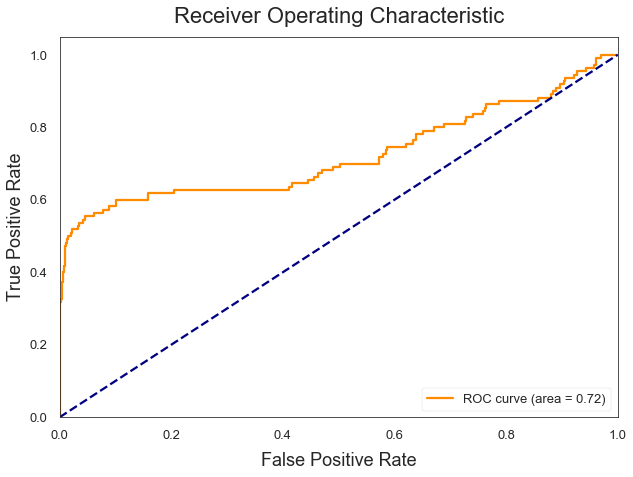

In [66]:
from sklearn.metrics import roc_curve, auc

y_pred_prop = final_model.predict_proba(x_test)[:,1]

fpr_log, tpr_log, _ = roc_curve(y_test, y_pred_prop)
roc_auc_log = auc(fpr_log, tpr_log)

sns.set_style("white")
plt.figure(figsize=(10, 7))
plt.plot(fpr_log, tpr_log, color='darkorange',
         label='ROC curve (area = %0.2f)' % roc_auc_log)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate',fontsize=18,labelpad =10)
plt.ylabel('True Positive Rate',fontsize=18)
plt.title('Receiver Operating Characteristic',fontsize=22).set_position([.5, 1.02])
plt.legend(loc="lower right",fontsize=13)
plt.show()

In [67]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.6370516288368812

# DECISION TREE

Testing accurcy score: 0.8912797281993206
Training accuracy score: 0.9072365225837785
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       773
           1       0.62      0.33      0.43       110

   micro avg       0.89      0.89      0.89       883
   macro avg       0.77      0.65      0.68       883
weighted avg       0.87      0.89      0.88       883



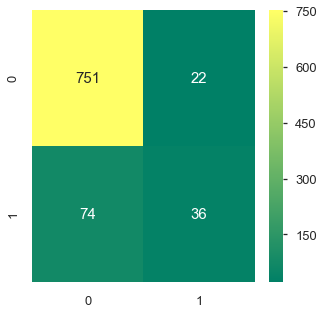

In [68]:
dtc = DecisionTreeClassifier( max_depth=1, min_samples_split=8, min_samples_leaf= 4)
dtc.fit(x_train, y_train)
acc = dtc.score(x_test, y_test)
print ("Testing accurcy score:", acc)
print ("Training accuracy score:", dtc.score(x_train, y_train))



y_p = dtc.predict(x_test)

cm = confusion_matrix(y_test, y_p)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, annot_kws = {'size':15}, cmap = 'summer', fmt='g')


cr = classification_report(y_test, y_p)
print(cr)

In [69]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_p)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.6494060919675408

# RANDOM FOREST CLASSIFIER


Training Accuracy : 0.9422049538610976
Testing Accuracy : 0.9229898074745186
              precision    recall  f1-score   support

           0       0.92      0.99      0.96       773
           1       0.92      0.42      0.57       110

   micro avg       0.92      0.92      0.92       883
   macro avg       0.92      0.71      0.77       883
weighted avg       0.92      0.92      0.91       883



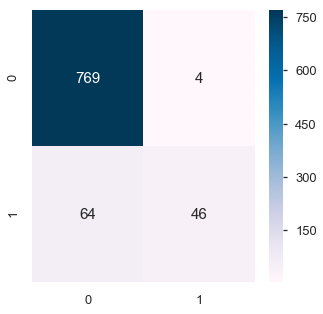

In [70]:
rfc = RandomForestClassifier(n_estimators = 200, max_depth =6, random_state=1, min_samples_split = 5)
rfc.fit(x_train, y_train)
y_predict = rfc.predict(x_test)
y_pred_quant = rfc.predict_proba(x_test)[:, 1]
y_preds = rfc.predict(x_test)
rfc_ac=rfc.score(x_test, y_test)
# evaluating the model
print("Training Accuracy :", rfc.score(x_train, y_train))
print("Testing Accuracy :", rfc_ac)

# cofusion matrix
cm = confusion_matrix(y_test, y_preds)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, annot_kws = {'size':15}, cmap = 'PuBu', fmt='g')

# classification report
cr = classification_report(y_test, y_preds)
print(cr)


In [71]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_preds)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.7065035869693049

# EVALUATION

In [72]:
y_log = y_pred
y_dt = y_p
y_rf = y_preds

In [73]:
cm_log = confusion_matrix(y_test,y_log)
cm_dt = confusion_matrix(y_test,y_dt)
cm_rf = confusion_matrix(y_test,y_rf)

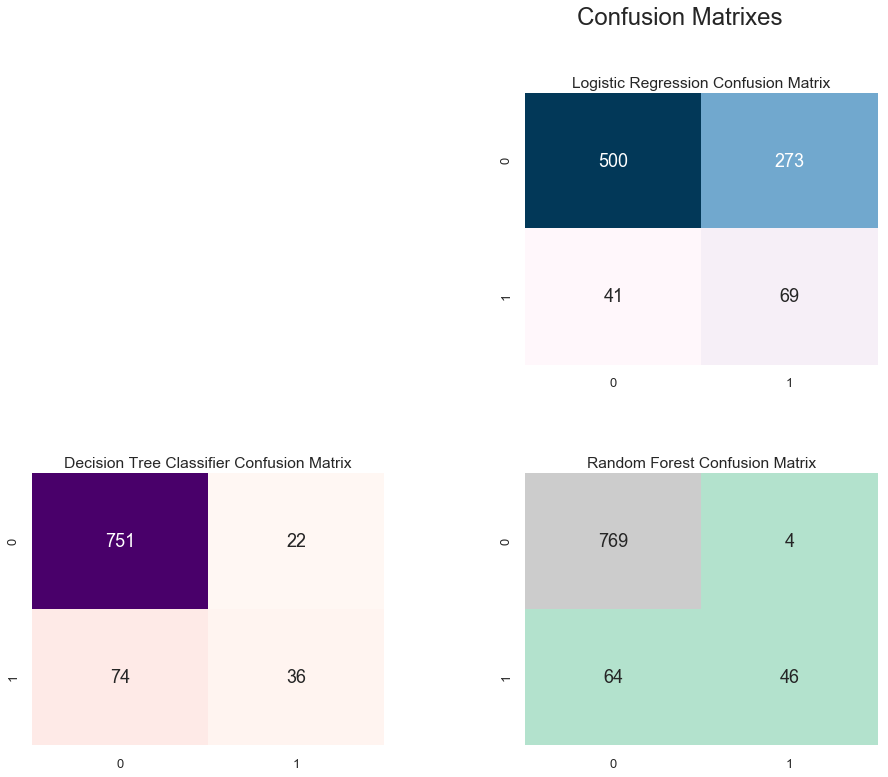

In [74]:
plt.figure(figsize=(24,12))

plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,3,2)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_log,annot=True,cmap="PuBu",fmt="d",cbar=False, annot_kws={"size": 18})

plt.subplot(2,3,4)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dt,annot=True,cmap="RdPu",fmt="d",cbar=False, annot_kws={"size": 18})

plt.subplot(2,3,5)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_rf,annot=True,cmap="Pastel2",fmt="d",cbar=False, annot_kws={"size": 18})




plt.show()

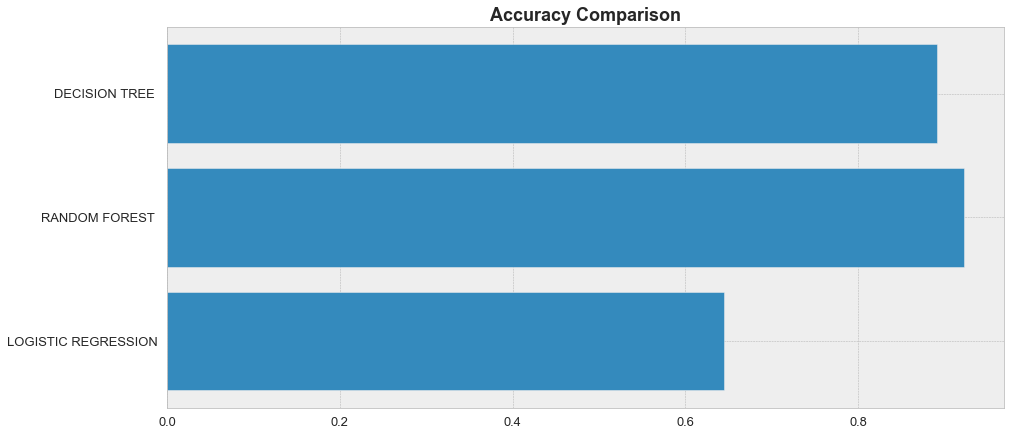

In [75]:
names=[]
names.append('LOGISTIC REGRESSION')
names.append('RANDOM FOREST ')
names.append('DECISION TREE ')
results=[]
results.append(log_ac)
results.append(rfc_ac)
results.append(acc)

plt.rcParams['figure.figsize'] = (15, 7)
plt.style.use('bmh') #style
plt.barh(names,results)
plt.title("Accuracy Comparison",  weight='bold', size=18)
sns.set_context('poster') #everything is larger..for smaller use paper, for presentation use talk
plt.Xlabel=results
plt.ylabel=names 
plt.show()

# EVALUATION

The decision tree is my preferred model here. Apart from its accuracy score,It and did better in in the false negative and true positive compared to others.

What could I have done better?

I believe I could have done better in regards to how I handled the outliers. This in result affected how properly my model could predict the true positive. I also can make the data more balanced to adress the imbalance and finally I can employ more metrics to analyze even depper, how well the model is predicting